# Data Analisys
------------------------------------------------------

### Data import

In [1]:
# Importing libraries
from importlib import reload  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime as dt
import sys
sys.path.append("src/")  # path contains python_file.py
import analysis_functions as af
import statsmodels as st # If you have not installed --> pip install statsmodels --user

# Importing data 
# * because an error we should use encoding='latin-1'

df = pd.read_csv('output/data_processed.csv', encoding='latin-1')
print(df.shape)
df.head()

(1425, 17)


Unnamed: 0   Case Number        Type    Country        Area  \
0           0    2018.06.25     Boating        USA  California   
1           6  2018.06.03.a  Unprovoked     BRAZIL  Pernambuco   
2           8  2018.05.26.b  Unprovoked        USA     Florida   
3          10    2018.05.24    Provoked  AUSTRALIA  Queensland   
4          13  2018.05.13.a     Invalid    ENGLAND    Cornwall   

                       Location        Activity Sex  Age  \
0   Oceanside, San Diego County        Paddling    F  57   
1         Piedade Beach, Recife        Swimming    M  18   
2  Cocoa Beach, Brevard  County         Walking    M  15   
3               Cairns Aquarium  Feeding sharks    M  32   
4                Off Land's End         Fishing    M  21   

                                              Injury Fatal (Y/N)       Time  \
0  No injury to occupant, outrigger canoe and pad...           N         18   
1                                              FATAL           Y  Afternoon   
2                              Lower left leg bitten           N         17   
3  Minor bite to hand by captive shark. PROVOKED ...           N    Morning   
4  Injured by teeth of a dead porbeagle shark he ...           N          8   

  moment_day Fatal_b       Species  shark_size        date  
0  Afternoon   False         White         NaN  2018-06-25  
1  Afternoon    True         Tiger         NaN  2018-06-03  
2  Afternoon   False          Bull         1.8  2018-05-26  
3    Morning   False          Grey         NaN  2018-05-24  
4    Morning   False  Unidentified         NaN  2018-05-13

### Trend analysis

In [2]:
df['date_dt'] = pd.to_datetime(df['date'])

0      2018-06-25
1      2018-06-03
2      2018-05-26
3      2018-05-24
4      2018-05-13
          ...    
1420   1880-11-25
1421   1868-05-13
1422          NaT
1423          NaT
1424          NaT
Name: date_dt, Length: 1425, dtype: datetime64[ns]

In [5]:
df=df.sort_values(by=['date_dt'])

Unnamed: 0 Case Number        Type       Country                   Area  \
1421        5922  1868.05.13  Unprovoked         INDIA           Hoogly River   
1420        5814  1880.11.25  Unprovoked     AUSTRALIA             Queensland   
1419        5684  1892.03.02    Provoked     AUSTRALIA        New South Wales   
1418        5648  1894.11.28  Unprovoked     AUSTRALIA        New South Wales   
1417        5545  1901.07.30  Unprovoked  SOUTH AFRICA  Western Cape Province   
...          ...         ...         ...           ...                    ...   
1388        5000  1932.00.00  Unprovoked  SOUTH AFRICA  Eastern Cape Province   
1408        5224  1922.05.24  Unprovoked       JAMAICA    Westmoreland Parish   
1422        6242     ND.0064  Unprovoked          IRAQ                 Basrah   
1423        6243     ND.0063  Unprovoked          IRAQ                 Basrah   
1424        6265     ND.0038  Unprovoked          IRAQ                 Basrah   

                                         Location  \
1421                                         Ghat   
1420                 Petrie Bight, Brisbane River   
1419                               Lake Macquarie   
1418                                   Newcastle    
1417                               Windmill Beach   
...                                           ...   
1388               Kowie River Mouth, Port Alfred   
1408                               Savanna-la-Mar   
1422                         Shatt-al-Arab River    
1423       Shatt-al-Arab River near Abu al Khasib   
1424  Shatt-el Arab River near a small boat stand   

                                               Activity Sex        Age  \
1421                                           Standing    M        35   
1420                                           Swimming    M        12   
1419                                            Fishing    M        21   
1418                                            Bathing    M        19   
1417                                           Swimming    M        29   
...                                                 ...  ...       ...   
1388              Collecting fish by lamplight in gully    M        23   
1408                                           Swimming    M        19   
1422  Swimming naked near a date palm where many dat...    M         6   
1423  Swimming in section of river used for washing ...    M        16   
1424                                           Swimming    M  13 or 14   

                                                 Injury Fatal (Y/N)  \
1421  FATAL, upper left thigh, groin & buttocks seve...           Y   
1420            Feet bitten, surgically amputated FATAL           Y   
1419  Lacerations to calf by netted shark PROVOKED I...           N   
1418                                     "Lost his arm"           N   
1417  Right leg bitten & foot severed, right arm bit...           Y   
...                                                 ...         ...   
1388        Right shin, calf and sole of foot lacerated           N   
1408        FATAL, arm severed, thigh severely bitten             Y   
1422                                        Arm severed           N   
1423         Right leg lacerated & surgically amputated           N   
1424      FATAL, left leg bitten with severe blood loss           Y   

           Time moment_day Fatal_b       Species  shark_size        date  \
1421         10    Morning    True        Ganges         NaN  1868-05-13   
1420  Afternoon  Afternoon    True          Bull         NaN  1880-11-25   
1419      Night      Night   False  Unidentified        3.70  1892-03-02   
1418    Morning    Morning   False  Unidentified        3.40  1894-11-28   
1417         14  Afternoon    True         White         NaN  1901-07-30   
...         ...        ...     ...           ...         ...         ...   
1388      Night      Night   False  Ragged Tooth        1.35         NaN   
1408         10    Morning    True  Unidentifi

In [13]:
df['year'], df['month'] = df['date_dt'].dt.year, df['date_dt'].dt.month
df=df.set_index(['year', 'month'])

---> Evolution of the data


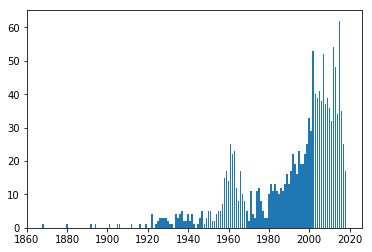

In [42]:
var=df.Type.groupby(['year']).count()
plt.bar(var.index,var.values)
print(f'---> Evolution of the data')

---> Evolution of the data


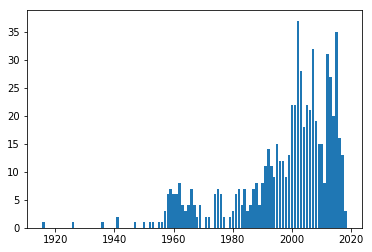

In [49]:
var=df.Country[df.Country=='USA'].groupby(['year']).count()
plt.bar(var.index,var.values)
print(f'---> Evolution of the data - USA Cases')

In [51]:
var=df.Country[df.Country=='AUSTRALIA'].groupby(['year']).count()
plt.bar(var.index,var.values)
print(f'---> Evolution of the data - Australia Cases')

USA              676
AUSTRALIA        307
SOUTH AFRICA     216
BAHAMAS           25
NEW ZEALAND       20
                ... 
THAILAND           1
SCOTLAND           1
ISRAEL             1
PACIFIC OCEAN      1
MICRONESIA         1
Name: Country, Length: 63, dtype: int64

---> Evolution of the data - SOUTH AFRICA Cases


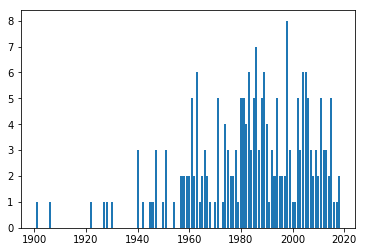

In [53]:
var=df.Country[df.Country=='SOUTH AFRICA'].groupby(['year']).count()
plt.bar(var.index,var.values)
print(f'---> Evolution of the data - SOUTH AFRICA Cases')

---> Season data - USA Cases


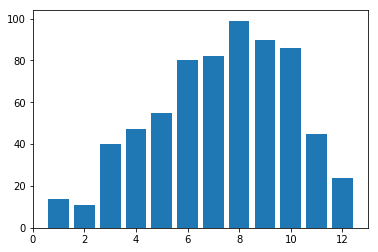

In [54]:
var=df.Country[df.Country=='USA'].groupby(['month']).count()
plt.bar(var.index,var.values)
print(f'---> Season data - USA Cases')

---> Season data - AUSTRALIA Cases


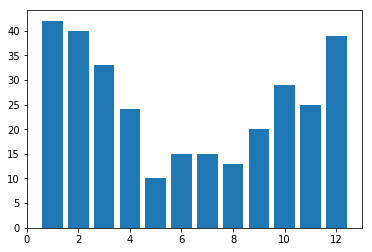

In [55]:
var=df.Country[df.Country=='AUSTRALIA'].groupby(['month']).count()
plt.bar(var.index,var.values)
print(f'---> Season data - AUSTRALIA Cases')

---> Season data - SOUTH AFRICA Cases


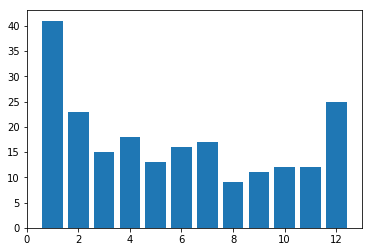

In [56]:
var=df.Country[df.Country=='SOUTH AFRICA'].groupby(['month']).count()
plt.bar(var.index,var.values)
print(f'---> Season data - SOUTH AFRICA Cases')

In [ ]:
var=df.Type.groupby(['year']).count()
plt.bar(var.index,var.values)
print(f'---> Evolution of the data')

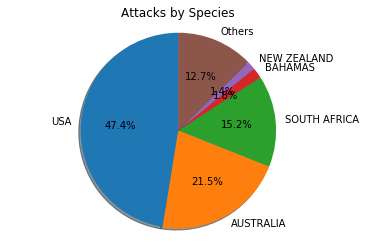

In [97]:
var_s_b=df.Species.value_counts()>30
var_s=df.Species.value_counts()
resto=var_s[~var_s_b].sum()
var_s=var_s[var_s_b]
var_s=var_s.append(pd.Series([resto], index=['Others']))

fig1, ax1 = plt.subplots()
ax1.pie(var.values, labels=var.index, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.set(aspect="equal", title='Attacks by Species')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


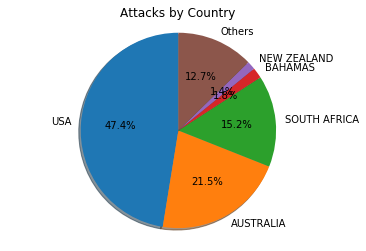

In [92]:
var_b=df.Country.value_counts()>15
var=df.Country.value_counts()
resto=var[~var_b].sum()
var=var[var_b]
var=var.append(pd.Series([resto], index=['Others']))

fig1, ax1 = plt.subplots()
ax1.pie(var.values, labels=var.index, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.set(aspect="equal", title='Attacks by Country')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [112]:
df_cs=df[['Country','Species','Activity']].groupby(['Country','Species']).count()
df_cs2=pd.DataFrame(df_cs.Activity)
#df_cs3=df_cs2.pivot(index='Country', columns='Species', values='Activity')
df_cs2

Activity
Country        Species               
AMERICAN SAMOA Blue                 1
               Tiger                1
ARGENTINA      White                1
AUSTRALIA      Blacktip             2
               Blue                 1
...                               ...
USA            White              134
VANUATU        Unidentified         2
VENEZUELA      Bull                 1
               Mako                 1
VIETNAM        Unidentified         3

[155 rows x 1 columns]

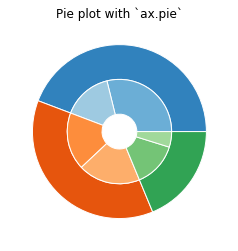

In [87]:
country = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [ ]:
var_b=df.Species.value_counts()>30
var=df.Species.value_counts()
resto=var[~var_b].sum()
var=var[var_b]
var=var.append(pd.Series([resto], index=['Others']))

In [88]:
var_b=df.Country.value_counts()>30
var=df.Country.value_counts()
resto=var[~var_b].sum()
var=var[var_b]
var=var.append(pd.Series([resto], index=['Others']))
var

USA             676
AUSTRALIA       307
SOUTH AFRICA    216
Others          226
dtype: int64

In [ ]:
result_3 = statsmodels.discrete.discrete_model.Probit(labf_part, ind_var_probit )
print(result_3.summary())